In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from ast import literal_eval
import time


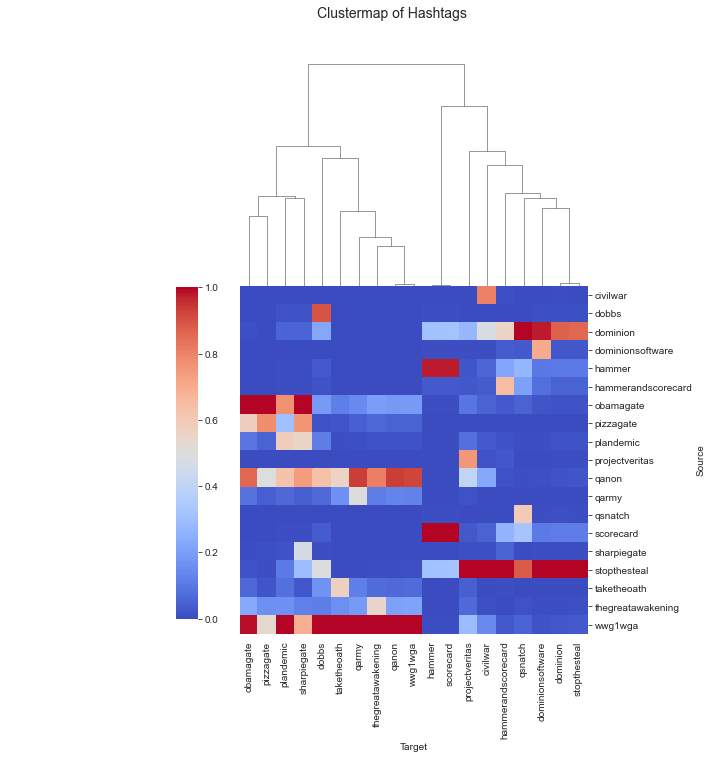

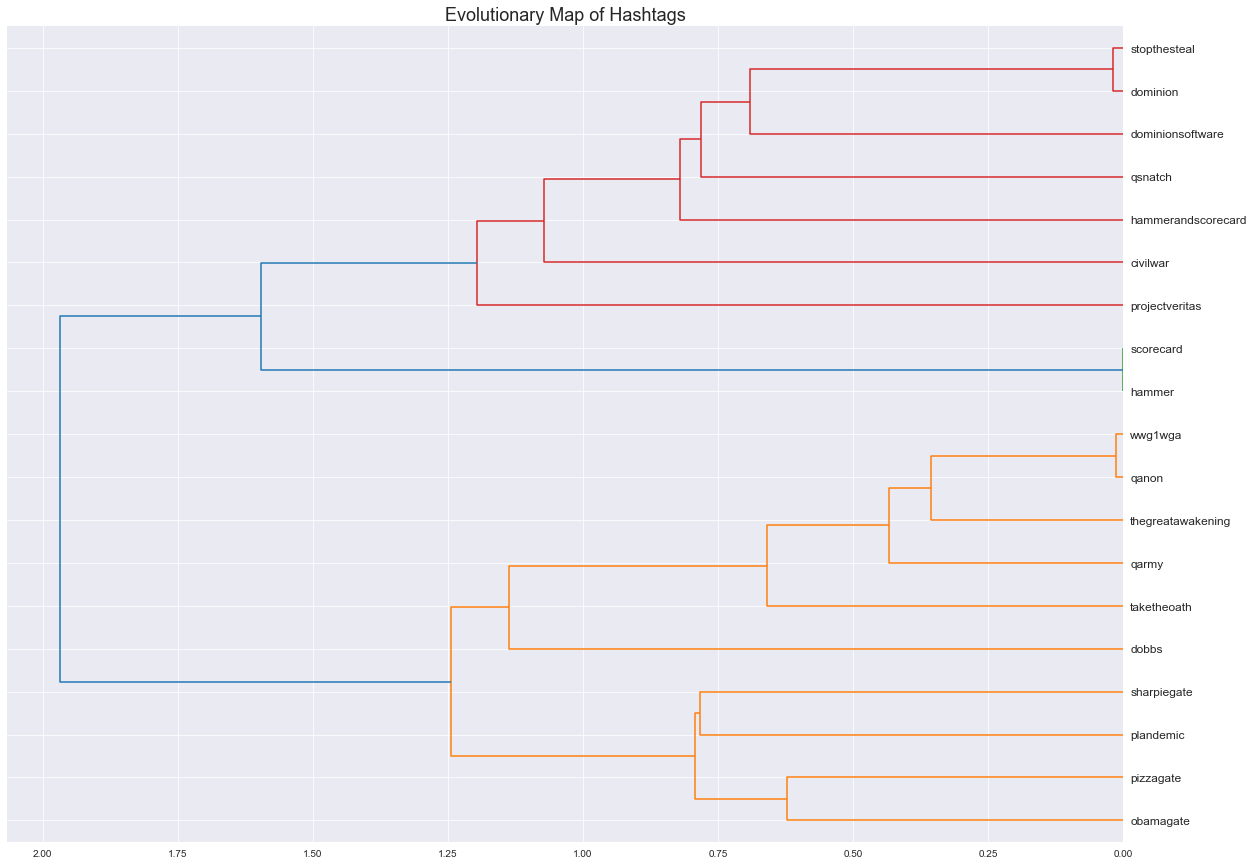

                    Id      Time
0          sharpiegate  0.000000
1                qarmy  0.274879
2                qanon  0.352721
3    thegreatawakening  0.377055
4          taketheoath  0.381153
5            pizzagate  0.442196
6            obamagate  0.467411
7                dobbs  0.480623
8              wwg1wga  0.550645
9             civilwar  0.599862
10              hammer  0.628262
11           scorecard  0.654143
12        stopthesteal  0.664518
13            dominion  0.675586
14           plandemic  0.676032
15    dominionsoftware  0.681692
16             qsnatch  0.695351
17      projectveritas  0.718047
18  hammerandscorecard  1.000000
       Source             Target        Weight  \
0    civilwar           civilwar  1.305996e-04   
1    civilwar              dobbs  2.513948e-07   
2    civilwar           dominion  2.434068e-03   
3    civilwar   dominionsoftware  3.770923e-07   
4    civilwar             hammer  8.484576e-06   
..        ...                ...        

In [20]:
input_directory_path =  # output path from replacer.py
output_path = # here

hashrepdf = pd.read_csv(output_directory_path +'/hash.csv').drop(['Unnamed: 0'],axis=1)

hashrepdf['Time'] = pd.to_datetime(hashrepdf.Time)
hashrepdf['Source'] = hashrepdf['Source'].apply(lambda x: tuple(set(literal_eval(x))))
hashrepdf['Target'] = hashrepdf['Target'].apply(lambda x: tuple(set(literal_eval(x))))

hashrepdf = hashrepdf.groupby(by=['Source','Target']).agg({'Weight':'sum','Time':pd.Series.mean}).reset_index()
hashrepdf['Source'] = hashrepdf['Source'].apply(lambda x: list(x))
hashrepdf['Target'] = hashrepdf['Target'].apply(lambda x: list(x))

hashrepdf['randNumCol'] = np.random.randint(1, 6000, hashrepdf.shape[0])
hashrepdf = hashrepdf.set_index('randNumCol')

hashout = hashrepdf.explode('Source').explode('Target').groupby(by=['Source','Target']).agg({'Weight':'sum','Time':pd.Series.mean}).reset_index()

hashout['Weight'] = (hashout['Weight'] - hashout['Weight'].min()) / (hashout['Weight'].max() - hashout['Weight'].min())

hashout[['Source','Target','Weight']].to_csv(output_path+'/edgelist.csv')

ax = sns.clustermap(pd.pivot(hashout, index=['Source'],columns='Target',values='Weight').fillna(0), row_cluster=False, dendrogram_ratio=0.4, cbar_pos = (0.25,0.2,0.03,0.46), cmap='coolwarm',standard_scale=1)
ax.fig.suptitle('Clustermap of Hashtags',x=0.55, y=1.05, fontsize=14)

plt.show()

fig = ax.fig
for ax1, filename in zip([ax.ax_col_dendrogram, ax.ax_row_dendrogram, ax.ax_heatmap],
                        ['col_dendrogram', 'row_dendrogram', 'heatmap']):
    extent = ax1.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())

labels = [t.get_text()  for t in ax.ax_heatmap.get_xticklabels()]

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,1,1)
dn = dendrogram(ax.dendrogram_col.linkage, labels=ax.ax_heatmap.get_yticklabels(), orientation='left', truncate_mode='level')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.title('Evolutionary Map of Hashtags', fontsize=18)

plt.show()

def convert_to_timestamp(x):
    return int(time.mktime(x.timetuple()))

timed = hashout.groupby('Source').agg({'Time':pd.Series.median}).sort_values('Time').reset_index()
timed['Time'] = timed['Time'].apply(convert_to_timestamp)

timed['Time'] = (timed.Time-timed.Time.min())/(timed.Time.max()-timed.Time.min())

timed = timed.rename({'Source':'Id'}, axis=1)

timed.to_csv(output_path+'/nodelist.csv')